In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import tensorflow as tf
print(tf.__version__)

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

2.4.0


In [2]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [3]:
df.shape

(1000, 3)

In [4]:
df.isnull().sum()

price       0
feature1    0
feature2    0
dtype: int64

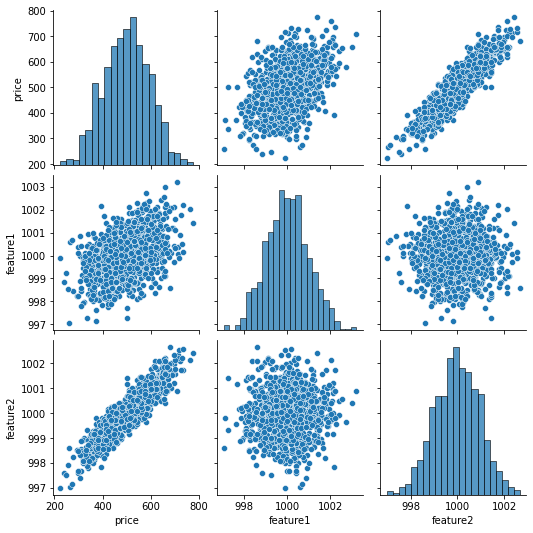

In [5]:
sns.pairplot(df)

In [14]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


In [6]:
from sklearn.model_selection import train_test_split
X = df[['feature1','feature2']].values # For Keras we need arrays not dataframe.
y = df[['price']].values # For Keras we need arrays not dataframe.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
# result will be between 0 and 1 x_new = Xi-min(x)/ (max(x)-min(x) )
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#units 1 hidden layerdaki  kac adet neuron(yuvarlak) olacak onu soyler
#input sayisi data daki feature sayisi
#input_dim=2 or inptut_dim - xtrain.shape[0]
#batchsize 32 satir 32 satir gonder veriyi
#epochs 1 gitti 1 geldi esittir 1 epoch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
model = Sequential()
model.add(Dense(4,activation='relu')) #Input Layer 
model.add(Dense(4,activation='relu')) #HIdden Layer 1
model.add(Dense(4,activation='relu')) #HIdden Layer 2
model.add(Dense(1)) #Outpur Layer
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train, y_train, batch_size=32, epochs=250) 
print(model.summary())

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 257187.1773
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 257268.7738
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 253035.3791
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 254884.3804
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 257246.9742
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 254655.1590
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 253295.5462
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256296.4728
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 252104.5836
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 258095.9606
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 252768.8573
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 1689.6123
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 1761.7286
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 1858.8180
Epoch 100/250
22/22 [==============================] - 0s 3ms/step - loss: 1629.2115
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 1680.8822
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 1644.6261
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 1482.2719
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 1549.2758
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 1532.2430
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 1468.9473
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 1311.5298
Epoch 108/250
22/22 [==============================] - 0s 2ms/step -

22/22 [==============================] - 0s 2ms/step - loss: 25.2655
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 25.5905
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 23.7313
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1458
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 24.1821
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 25.1667
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 23.9451
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1846
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 24.8693
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 26.6008
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7879
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 22.7530
Epoch 206/250
22/2

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

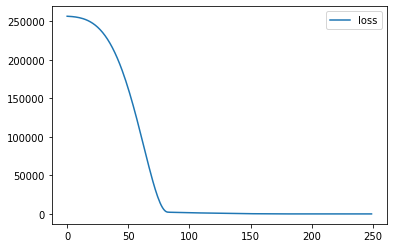

In [10]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 100.0)

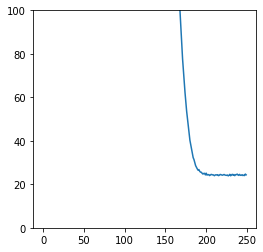

In [11]:
loss_df=pd.DataFrame(model.history.history)
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(loss_df)
ax.set_ylim(0,100)

# loss_df.plot()
# plt.ylim(0,100)

In [12]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
my_dict={"Actual":y_test.reshape(300,), "Pred":y_pred.reshape(300,)}
print(eval_metrics(y_test, y_pred))
compare=pd.DataFrame(my_dict)
compare

r2_score: 0.9971627204819308 
 mae: 3.9983995048078715 
 mse: 24.94545136649183 
 rmse: 4.994542157845085
None


,Actual,Pred
0,402.296319,405.160400
1,624.156198,623.487976
2,582.455066,592.068359
3,578.588606,572.157715
4,371.224104,366.476196
...,...,...
295,525.704657,528.960938
296,502.909473,515.245728
297,612.727910,609.594849
298,417.569725,416.828583


In [13]:
eval_metrics(y_test, y_pred)

r2_score: 0.9971627204819308 
 mae: 3.9983995048078715 
 mse: 24.94545136649183 
 rmse: 4.994542157845085


(0.0, 100.0)

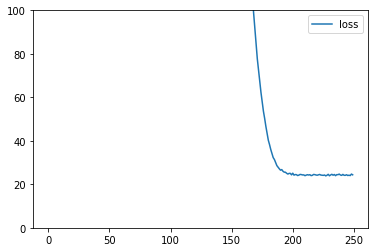

In [21]:
# loss_df=pd.DataFrame(model.history.history)
# fig, ax = plt.subplots(1,1,figsize=(4,4))
# ax.plot(loss_df)
# ax.set_ylim(0,100)
loss_df.plot()
plt.ylim(0,100)

In [23]:
model.evaluate(X_train, y_train,verbose=1)

22/22 [==============================] - 0s 2ms/step - loss: 23.9009


23.900938034057617

In [24]:
model.evaluate(X_test, y_test,verbose=1)

10/10 [==============================] - 0s 2ms/step - loss: 24.9454


24.94544792175293

<AxesSubplot:xlabel='Actual', ylabel='Pred'>

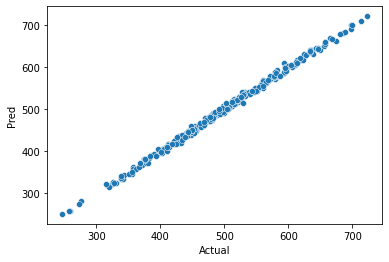

In [30]:
sns.scatterplot(x="Actual", y='Pred', data=compare, legend='full')

# Make a new prediction

In [31]:
new_data = [[999,1001]]

In [32]:
new_data = scaler.transform(new_data)
new_data

array([[0.30608328, 0.71932348]])

In [34]:
model.predict(new_data)

array([[548.1676]], dtype=float32)

In [33]:
model.predict(new_data)[0][0]

548.1676

# Saving and Loading MOdel

In [36]:
from tensorflow.keras.models import load_model
model.save('my_model_001')
loaded_model = load_model('my_model_001')

INFO:tensorflow:Assets written to: my_model_001/assets


In [37]:
loaded_model.predict(new_data)

array([[548.1676]], dtype=float32)